# 1. Data Collection

We used Selenium for collecting Data from Kayak.com, which is an open-source project that contains a wide range of libraries and tools that are utilized to gather data from web browsers such as Firefox, Google Chrome, Safari etc. and enables a user to use it for web browser based or related automations. Out of the various tools in Selenium we used a particular function called WebDriver Protocol which allows us to extract data from the web browser with a particular website or web page from which we want to scrape the data.

In [111]:
from time import sleep
import pandas as pd
from selenium import webdriver
from bs4 import BeautifulSoup
import os
from selenium.webdriver.common.by import By
import datetime

In [112]:
#lst_from_city = ['SFO', 'ATL', 'SFO', 'MCO', 'LAX', 'CLT', 'LAX', 'DFW', 'JFK', 'MIA']
#lst_to_city = ['DFW', 'DTW', 'BOS', 'DEN', 'SFO', 'MIA', 'ATL', 'DEN', 'LAX', 'ORD']

city_from = "SFO"
city_to = "DFW"
date_start = "2023-08-23"
date_end = "2023-09-22"

In [113]:
# Get the current time
current_time = datetime.datetime.now().strftime("%I:%M %p")

# Get the current date
current_date = datetime.datetime.now().strftime("%m-%d-%Y")

# Get the current day
current_day = datetime.datetime.now().strftime("%A")

driver = webdriver.Chrome()
url = 'https://www.kayak.com/flights/{from_location}-{to_location}/{departure_date}/{arrival_date}?sort=bestflight_a'.format(from_location = city_from, to_location = city_to, departure_date = date_start, arrival_date = date_end)
driver.get(url)

In [114]:
search_information = driver.find_elements("xpath", '//*[@class="lfBz"]')
print(search_information)

[<selenium.webdriver.remote.webelement.WebElement (session="ef874a5fb508564b70c5fc0eba6aa54e", element="3EBEA05726006D1972A1AA1F7B19584C_element_3")>]


In [115]:
flight_rows = driver.find_elements("xpath", '//*[@class="nrc6"]')
print(flight_rows)

[<selenium.webdriver.remote.webelement.WebElement (session="ef874a5fb508564b70c5fc0eba6aa54e", element="3EBEA05726006D1972A1AA1F7B19584C_element_4")>, <selenium.webdriver.remote.webelement.WebElement (session="ef874a5fb508564b70c5fc0eba6aa54e", element="3EBEA05726006D1972A1AA1F7B19584C_element_5")>, <selenium.webdriver.remote.webelement.WebElement (session="ef874a5fb508564b70c5fc0eba6aa54e", element="3EBEA05726006D1972A1AA1F7B19584C_element_6")>, <selenium.webdriver.remote.webelement.WebElement (session="ef874a5fb508564b70c5fc0eba6aa54e", element="3EBEA05726006D1972A1AA1F7B19584C_element_7")>, <selenium.webdriver.remote.webelement.WebElement (session="ef874a5fb508564b70c5fc0eba6aa54e", element="3EBEA05726006D1972A1AA1F7B19584C_element_8")>, <selenium.webdriver.remote.webelement.WebElement (session="ef874a5fb508564b70c5fc0eba6aa54e", element="3EBEA05726006D1972A1AA1F7B19584C_element_9")>, <selenium.webdriver.remote.webelement.WebElement (session="ef874a5fb508564b70c5fc0eba6aa54e", eleme

In [116]:
lst_date_of_booking = []
lst_day_of_booking = []
lst_source_airport = []
lst_destination_airport = []
lst_airline_names = []
lst_airline_codes = []
lst_prices = []
lst_travel_date_from = []
lst_travel_date_to = []

In [117]:
for WebElement in flight_rows:
    elementHTML = WebElement.get_attribute('outerHTML')
    elementSoup = BeautifulSoup(elementHTML, 'html.parser')
    
    #Date_of_Booking
    lst_date_of_booking.append(current_date)
    
    #Day_of_Booking
    lst_day_of_booking.append(current_day)
    
    #Source_Airport
    lst_source_airport.append(city_from.upper())
    
    #Destination_Airport
    lst_destination_airport.append(city_to.upper())
    
    #Airline_Name
    temp_airline = elementSoup.find("div", {"class": "nrc6-content-section"})
    airline = temp_airline.find("div", {"class":"c_cgF c_cgF-mod-variant-default"})
    lst_airline_names.append(airline.text)
    
    #Airline_Code
    temp_airline_code = elementSoup.find("div", {"class":"yuAt yuAt-pres-rounded"})
    airline_code = temp_airline_code.find("div", {"class":"nAz5-carrier-text"})
    lst_airline_codes.append(airline_code.text)
    
    #Price
    temp_price = elementSoup.find("div", {"class": "nrc6-price-section"})
    price = temp_price.find("div", {"class":"f8F1-price-text"})
    lst_prices.append(price.text)
    
    #Travel Date From
    lst_travel_date_from.append(date_start)
    
    #Travel Date To
    lst_travel_date_to.append(date_end)
    
print(lst_airline_names)
print(lst_prices)

['Frontier', 'Frontier', 'United Airlines', 'United Airlines', 'Alaska Airlines', 'American Airlines', 'American Airlines', 'American Airlines', 'American Airlines', 'American Airlines', 'American Airlines', 'American Airlines', 'American Airlines', 'American Airlines', 'American Airlines', 'American Airlines']
['$119', '$109', '$144', '$144', '$188', '$218', '$218', '$218', '$218', '$218', '$238', '$238', '$238', '$238', '$248', '$248']


In [132]:
df = pd.DataFrame({'Date_of_Booking':lst_date_of_booking, 'Day_of_Booking':lst_day_of_booking, 
                   'Source_Airport':lst_source_airport, 'Destination_Airport': lst_destination_airport, 
                   'Airline_Name': lst_airline_names, 'Airline_Code':lst_airline_codes, 'Price': lst_prices,
                   'Travel_Date_From':lst_travel_date_from, 'Travel_Date_To':lst_travel_date_to})

In [133]:
df.to_excel('C:\\Users\\sande\\Downloads\\Final Data Set.xlsx')

# 2. Data Cleaning

In [197]:
from pathlib import Path
import numpy as np
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [198]:
final_df = pd.read_csv("C:\\Users\\sande\\Downloads\\Final Data Set.csv", parse_dates=["Date_of_Booking", "Travel_Date_From", "Travel_Date_To"])
display(final_df)

,Date_of_Booking,Day_of_Booking,Source_Airport,Destination_Airport,Airline_Name,Airline_Code,Price,Travel_Date_From,Travel_Date_To
0,2022-02-01,Tuesday,SFO,DFW,Frontier Airlines,F9 2710,80,2022-05-23,2022-06-22
1,2022-02-01,Tuesday,SFO,DFW,Delta Airlines,DL679,75,2022-05-23,2022-06-22
2,2022-02-01,Tuesday,SFO,DFW,United Airlines,UA 1765,123,2022-05-23,2022-06-22
3,2022-02-01,Tuesday,SFO,DFW,American Airlines,AA 2904,108,2022-05-23,2022-06-22
4,2022-02-01,Tuesday,SFO,DFW,Southwest Airlines,SW 5321,110,2022-05-23,2022-06-22
...,...,...,...,...,...,...,...,...,...
7115,2022-04-30,Saturday,DFW,DEN,Frontier Airlines,F510,205,2022-05-23,2022-06-22
7116,2022-04-30,Saturday,DFW,DEN,United Airlines,U880,213,2022-05-23,2022-06-22
7117,2022-04-30,Saturday,DFW,DEN,Frontier Airlines,F4450,192,2022-05-23,2022-06-22
7118,2022-04-30,Saturday,DFW,DEN,Frontier Airlines,F570,195,2022-05-23,2022-06-22


1. Identifying the duplicate values or records in the Data set and removing them

In [199]:
cleaned_df = final_df.drop_duplicates()
display(cleaned_df)

,Date_of_Booking,Day_of_Booking,Source_Airport,Destination_Airport,Airline_Name,Airline_Code,Price,Travel_Date_From,Travel_Date_To
0,2022-02-01,Tuesday,SFO,DFW,Frontier Airlines,F9 2710,80,2022-05-23,2022-06-22
1,2022-02-01,Tuesday,SFO,DFW,Delta Airlines,DL679,75,2022-05-23,2022-06-22
2,2022-02-01,Tuesday,SFO,DFW,United Airlines,UA 1765,123,2022-05-23,2022-06-22
3,2022-02-01,Tuesday,SFO,DFW,American Airlines,AA 2904,108,2022-05-23,2022-06-22
4,2022-02-01,Tuesday,SFO,DFW,Southwest Airlines,SW 5321,110,2022-05-23,2022-06-22
...,...,...,...,...,...,...,...,...,...
7115,2022-04-30,Saturday,DFW,DEN,Frontier Airlines,F510,205,2022-05-23,2022-06-22
7116,2022-04-30,Saturday,DFW,DEN,United Airlines,U880,213,2022-05-23,2022-06-22
7117,2022-04-30,Saturday,DFW,DEN,Frontier Airlines,F4450,192,2022-05-23,2022-06-22
7118,2022-04-30,Saturday,DFW,DEN,Frontier Airlines,F570,195,2022-05-23,2022-06-22


2. Checking for missing or null data

In [200]:
cleaned_df.isnull().sum()

Date_of_Booking        0
Day_of_Booking         0
Source_Airport         0
Destination_Airport    0
Airline_Name           0
Airline_Code           0
Price                  0
Travel_Date_From       0
Travel_Date_To         0
dtype: int64

3. Filtering the Data based on the source and destination airports.

In [201]:
source_airport = 'SFO'
destination_airport = 'DFW'
filtered_df = cleaned_df[(cleaned_df['Source_Airport'] == source_airport) & (cleaned_df['Destination_Airport'] == destination_airport)]
filtered_df.set_index('Date_of_Booking', inplace=True)

filtered_df = filtered_df.resample('D').mean().fillna(0)
print(filtered_df.head())

                 Price
Date_of_Booking       
2022-02-01       101.1
2022-02-02        95.1
2022-02-03       155.9
2022-02-04       173.2
2022-02-05       156.8


C:\Users\sande\AppData\Local\Temp\ipykernel_32608\66099838.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  filtered_df = filtered_df.resample('D').mean().fillna(0)


# 3. Exploratory Data Analysis (EDA)

In [202]:
df = cleaned_df
df['Date_of_Booking'] = pd.to_datetime(df['Date_of_Booking'])
df['Travel_Date_From'] = pd.to_datetime(df['Travel_Date_From'])
df['Travel_Date_To'] = pd.to_datetime(df['Travel_Date_To'])
df.set_index('Date_of_Booking', inplace=True)

C:\Users\sande\AppData\Local\Temp\ipykernel_32608\408360949.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_of_Booking'] = pd.to_datetime(df['Date_of_Booking'])
C:\Users\sande\AppData\Local\Temp\ipykernel_32608\408360949.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Travel_Date_From'] = pd.to_datetime(df['Travel_Date_From'])
C:\Users\sande\AppData\Local\Temp\ipykernel_32608\408360949.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

## Histogram

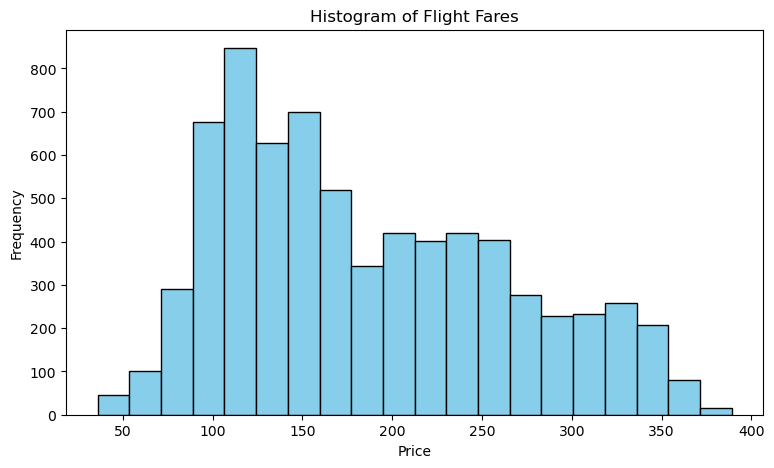

In [221]:
plt.figure(figsize=(9, 5))
plt.hist(df['Price'], bins=20, edgecolor='black', color='skyblue')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Flight Fares')
plt.show()

## Box plot

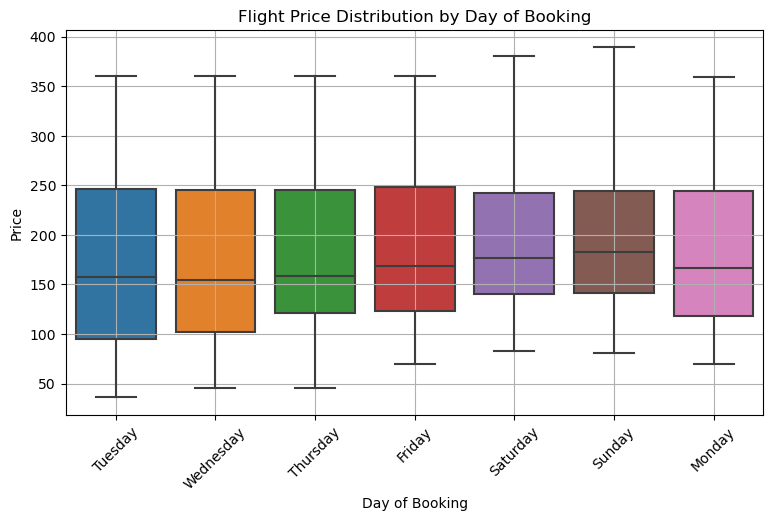

In [207]:
plt.figure(figsize=(9, 5))
sns.boxplot(x='Day_of_Booking', y='Price', data=df)
plt.xlabel('Day of Booking')
plt.ylabel('Price')
plt.title('Flight Price Distribution by Day of Booking')
plt.xticks(rotation=45)
plt.grid()
plt.show()

## Bar plot

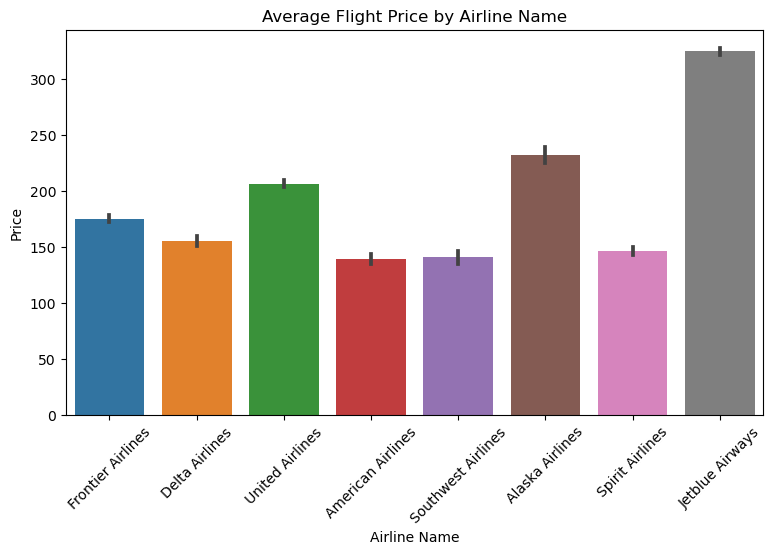

In [223]:
plt.figure(figsize=(9, 5))
sns.barplot(x='Airline_Name', y='Price', data=df)
plt.xlabel('Airline Name')
plt.ylabel('Price')
plt.title('Average Flight Price by Airline Name')
plt.xticks(rotation=45)
plt.show()

## Density plot

C:\Users\sande\AppData\Local\Temp\ipykernel_32608\2735228863.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Price'], shade=True)


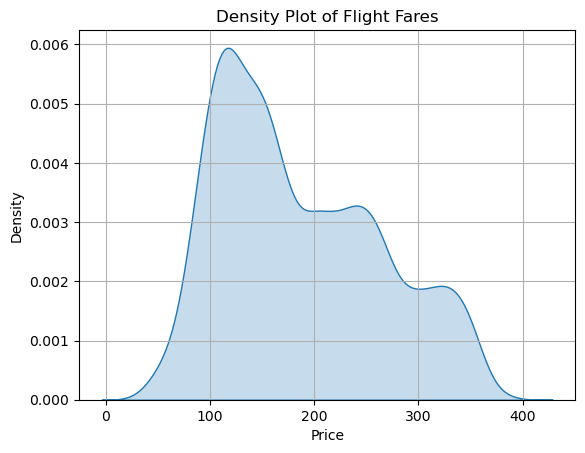

In [224]:
sns.kdeplot(df['Price'], shade=True)
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Density Plot of Flight Fares')
plt.grid()
plt.show()

# 4. Data Modeling using Time Series Analysis

## ARIMA Model

We performed the Time Series Analysis initially for the SFO to DFW route

In [235]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import STL
from sklearn.metrics import mean_absolute_error, mean_squared_error

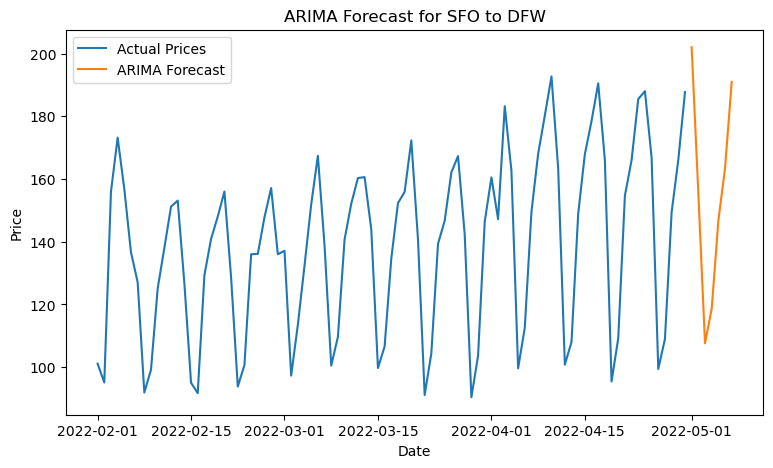

In [236]:
model_arima = ARIMA(filtered_data['Price'], order=(5, 1, 0))
results_arima = model_arima.fit()

forecast_arima = results_arima.forecast(steps=7)

plt.figure(figsize=(9, 5))
plt.plot(filtered_data['Price'], label='Actual Prices')
plt.plot(forecast_arima, label='ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'ARIMA Forecast for {source_airport} to {destination_airport}')
plt.legend()
plt.show()


## Exponential Smoothing Model

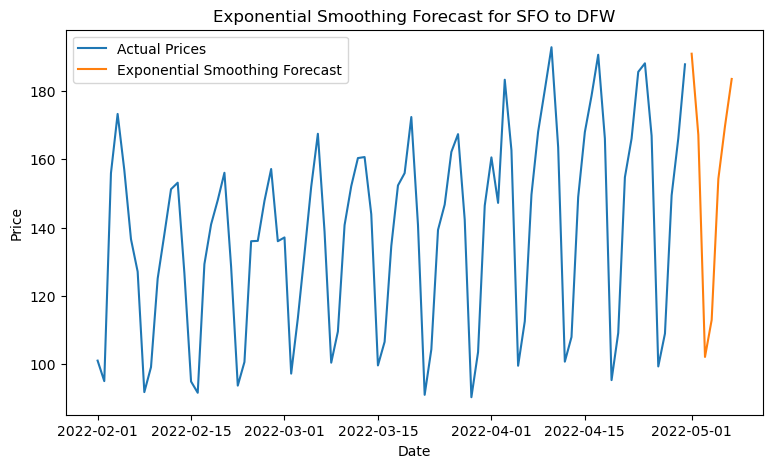

In [237]:
model_exp_smoothing = ExponentialSmoothing(filtered_data['Price'], seasonal_periods=7, trend='add', seasonal='add')
results_exp_smoothing = model_exp_smoothing.fit()
forecast_exp_smoothing = results_exp_smoothing.forecast(steps=7)

plt.figure(figsize=((9, 5)))
plt.plot(filtered_data['Price'], label='Actual Prices')
plt.plot(forecast_exp_smoothing, label='Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Exponential Smoothing Forecast for {source_airport} to {destination_airport}')
plt.legend()
plt.show()

## Sesonal Decomposition Model

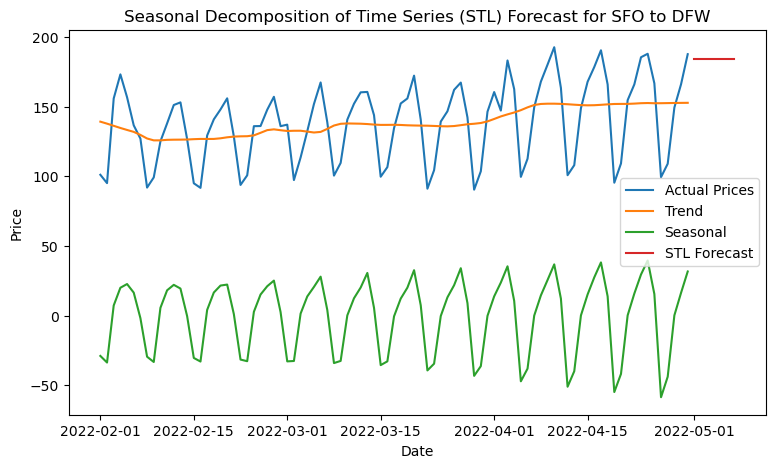

In [238]:
stl = STL(filtered_data['Price'], seasonal=13)
result_stl = stl.fit()
trend_component = result_stl.trend
seasonal_component = result_stl.seasonal
last_date = filtered_data.index[-1]
next_seven_days = pd.date_range(start=last_date + pd.DateOffset(1), periods=7, freq='D')
next_seven_days_seasonal = seasonal_component[seasonal_component.index >= last_date][:7]

forecast_stl = trend_component[-1] + next_seven_days_seasonal
forecast_stl = [forecast_stl[0]] * 7

plt.figure(figsize=(9, 5))
plt.plot(filtered_data['Price'], label='Actual Prices')
plt.plot(trend_component, label='Trend')
plt.plot(seasonal_component, label='Seasonal')
plt.plot(next_seven_days, forecast_stl, label='STL Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Seasonal Decomposition of Time Series (STL) Forecast for {source_airport} to {destination_airport}')
plt.legend()
plt.show()


## Comparison of Models

In [239]:
true_values = filtered_data['Price'][-7:]

forecast_arima = results_arima.forecast(steps=7)
forecast_exp_smoothing = results_exp_smoothing.forecast(steps=7)
forecast_stl = result_stl.trend[-7:] + result_stl.seasonal[-7:]
def calculate_mape(true_values, forecast_values):
    absolute_percentage_errors = np.abs((true_values - forecast_values) / true_values)
    valid_absolute_percentage_errors = np.where(np.isfinite(absolute_percentage_errors), absolute_percentage_errors, 0)  # Replace nan and inf with 0
    return np.mean(valid_absolute_percentage_errors) * 100

# Calculate MAE, MSE, RMSE and MAPE for each model
mae_arima = mean_absolute_error(true_values, forecast_arima)
mse_arima = mean_squared_error(true_values, forecast_arima)
rmse_arima = np.sqrt(mse_arima)
mape_arima = calculate_mape(true_values, forecast_arima)

mae_exp_smoothing = mean_absolute_error(true_values, forecast_exp_smoothing)
mse_exp_smoothing = mean_squared_error(true_values, forecast_exp_smoothing)
rmse_exp_smoothing = np.sqrt(mse_exp_smoothing)
mape_exp_smoothing = calculate_mape(true_values, forecast_exp_smoothing)

mae_stl = mean_absolute_error(true_values, forecast_stl)
mse_stl = mean_squared_error(true_values, forecast_stl)
rmse_stl = np.sqrt(mse_stl)
mape_stl = calculate_mape(true_values, forecast_stl)

# Compare the metrics
print("ARIMA Metrics: MAE={}, MSE={}, RMSE={}, MAPE={}".format(mae_arima, mse_arima, rmse_arima, mape_arima))
print("Exponential Smoothing Metrics: MAE={}, MSE={}, RMSE={}, MAPE={}".format(mae_exp_smoothing, mse_exp_smoothing, rmse_exp_smoothing, mape_exp_smoothing))
print("STL Metrics: MAE={}, MSE={}, RMSE={}, MAPE={}".format(mae_stl, mse_stl, rmse_stl, mape_stl))


ARIMA Metrics: MAE=7.401727872648435, MSE=72.83408339997088, RMSE=8.534288687405112, MAPE=0.0
Exponential Smoothing Metrics: MAE=3.221549630018385, MSE=12.288849873055648, RMSE=3.505545588500547, MAPE=0.0
STL Metrics: MAE=2.9781795443942536, MSE=11.53040980260395, RMSE=3.3956457121737467, MAPE=2.0876013299071867


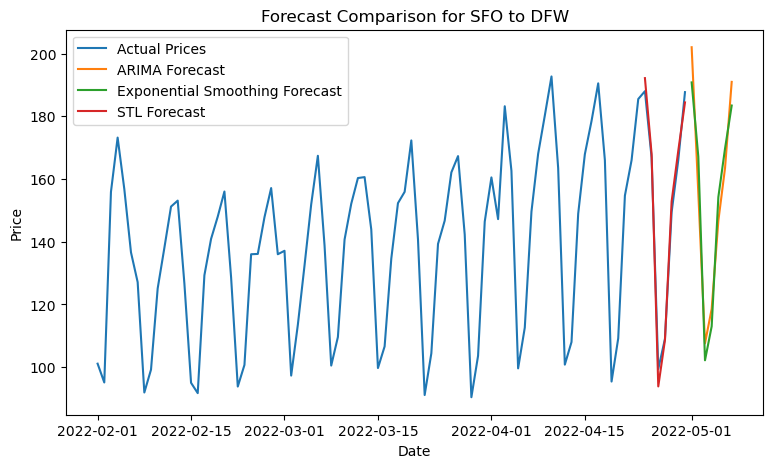

In [241]:
plt.figure(figsize=(9, 5))
plt.plot(filtered_data['Price'], label='Actual Prices')
plt.plot(forecast_arima, label='ARIMA Forecast')
plt.plot(forecast_exp_smoothing, label='Exponential Smoothing Forecast')
plt.plot(forecast_stl, label='STL Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(f'Forecast Comparison for {source_airport} to {destination_airport}')
plt.legend()
plt.show()

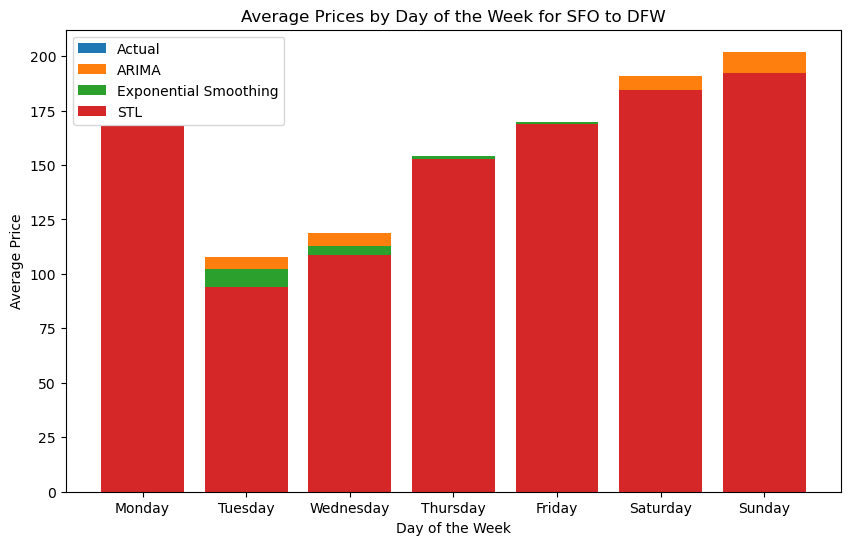

In [242]:
forecast_data = pd.DataFrame({
    'Actual': true_values,
    'ARIMA': forecast_arima,
    'Exponential Smoothing': forecast_exp_smoothing,
    'STL': forecast_stl
})

forecast_data['Day_of_Week'] = forecast_data.index.dayofweek
average_prices = forecast_data.groupby('Day_of_Week').mean()
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
plt.bar(day_of_week, average_prices['Actual'], label='Actual')
plt.bar(day_of_week, average_prices['ARIMA'], label='ARIMA')
plt.bar(day_of_week, average_prices['Exponential Smoothing'], label='Exponential Smoothing')
plt.bar(day_of_week, average_prices['STL'], label='STL')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price')
plt.title(f'Average Prices by Day of the Week for {source_airport} to {destination_airport}')
plt.legend()
plt.show()

### LAX to SFO

In [286]:
source_airport = 'LAX'
destination_airport = 'SFO'
filtered_df = cleaned_df[(cleaned_df['Source_Airport'] == source_airport) & (cleaned_df['Destination_Airport'] == destination_airport)]

filtered_df = filtered_df.resample('D').mean().fillna(0)
print(filtered_df.head())

                 Price
Date_of_Booking       
2022-02-01       139.3
2022-02-02       147.6
2022-02-03       128.1
2022-02-04       130.3
2022-02-05       151.7


C:\Users\sande\AppData\Local\Temp\ipykernel_32608\25607998.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  filtered_df = filtered_df.resample('D').mean().fillna(0)


In [287]:
model_arima = ARIMA(filtered_df['Price'], order=(5, 1, 0))
results_arima = model_arima.fit()
forecast_arima = results_arima.forecast(steps=7)

model_exp_smoothing = ExponentialSmoothing(filtered_data['Price'], seasonal_periods=7, trend='add', seasonal='add')
results_exp_smoothing = model_exp_smoothing.fit()
forecast_exp_smoothing = results_exp_smoothing.forecast(steps=7)

stl = STL(filtered_df['Price'], seasonal=13)
result_stl = stl.fit()
trend_component = result_stl.trend
seasonal_component = result_stl.seasonal
last_date = filtered_data.index[-1]
next_seven_days = pd.date_range(start=last_date + pd.DateOffset(1), periods=7, freq='D')
next_seven_days_seasonal = seasonal_component[seasonal_component.index >= last_date][:7]
forecast_stl = trend_component[-1] + next_seven_days_seasonal
forecast_stl = [forecast_stl[0]] * 7

true_values = filtered_df['Price'][-7:]

forecast_arima = results_arima.forecast(steps=7)
forecast_exp_smoothing = results_exp_smoothing.forecast(steps=7)
forecast_stl = result_stl.trend[-7:] + result_stl.seasonal[-7:]
def calculate_mape(true_values, forecast_values):
    absolute_percentage_errors = np.abs((true_values - forecast_values) / true_values)
    valid_absolute_percentage_errors = np.where(np.isfinite(absolute_percentage_errors), absolute_percentage_errors, 0)  # Replace nan and inf with 0
    return np.mean(valid_absolute_percentage_errors) * 100

mae_arima = mean_absolute_error(true_values, forecast_arima)
mse_arima = mean_squared_error(true_values, forecast_arima)
rmse_arima = np.sqrt(mse_arima)
mape_arima = calculate_mape(true_values, forecast_arima)

mae_exp_smoothing = mean_absolute_error(true_values, forecast_exp_smoothing)
mse_exp_smoothing = mean_squared_error(true_values, forecast_exp_smoothing)
rmse_exp_smoothing = np.sqrt(mse_exp_smoothing)
mape_exp_smoothing = calculate_mape(true_values, forecast_exp_smoothing)

mae_stl = mean_absolute_error(true_values, forecast_stl)
mse_stl = mean_squared_error(true_values, forecast_stl)
rmse_stl = np.sqrt(mse_stl)
mape_stl = calculate_mape(true_values, forecast_stl)

print("LAX to SFO")
print("ARIMA Metrics: MAE={:.3f}, MSE={:.3f}, RMSE={:.3f}, MAPE={:.3f}".format(mae_arima, mse_arima, rmse_arima, mape_arima))
print("Exponential Smoothing Metrics: MAE={:.3f}, MSE={:.3f}, RMSE={:.3f}, MAPE={:.3f}".format(mae_exp_smoothing, mse_exp_smoothing, rmse_exp_smoothing, mape_exp_smoothing))
print("STL Metrics: MAE={:.3f}, MSE={:.3f}, RMSE={:.3f}, MAPE={:.3f}".format(mae_stl, mse_stl, rmse_stl, mape_stl))

LAX to SFO
ARIMA Metrics: MAE=8.149, MSE=96.692, RMSE=9.833, MAPE=0.000
Exponential Smoothing Metrics: MAE=29.338, MSE=987.909, RMSE=31.431, MAPE=0.000
STL Metrics: MAE=5.446, MSE=37.433, RMSE=6.118, MAPE=3.813


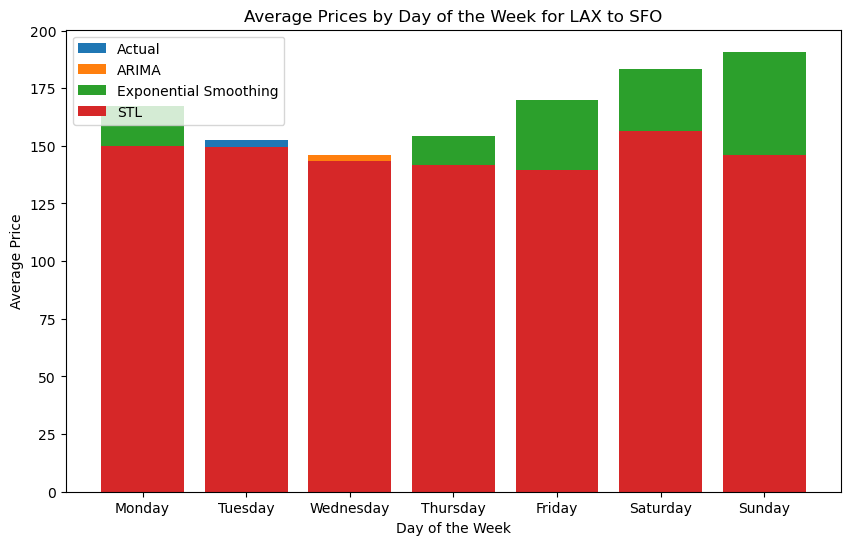

In [288]:
forecast_data = pd.DataFrame({
    'Actual': true_values,
    'ARIMA': forecast_arima,
    'Exponential Smoothing': forecast_exp_smoothing,
    'STL': forecast_stl
})

forecast_data['Day_of_Week'] = forecast_data.index.dayofweek
average_prices = forecast_data.groupby('Day_of_Week').mean()
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
plt.bar(day_of_week, average_prices['Actual'], label='Actual')
plt.bar(day_of_week, average_prices['ARIMA'], label='ARIMA')
plt.bar(day_of_week, average_prices['Exponential Smoothing'], label='Exponential Smoothing')
plt.bar(day_of_week, average_prices['STL'], label='STL')
plt.xlabel('Day of the Week')
plt.ylabel('Average Price')
plt.title(f'Average Prices by Day of the Week for {source_airport} to {destination_airport}')
plt.legend()
plt.show()